# Questão 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier


data2 = pd.read_csv('avila-tr.txt')

### As colunas do dataset *avila-tr* não estavam nomeadas, então as nomeamos de C1 até C10 e a última coluna como SAIDA.


### Verificando a ausência de dados no *dataset*


In [3]:
data2.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
SAIDA    0
dtype: int64

### Como mostra a consulta acima, não existe nenhum valor ausente.
### Verificando a correlação

In [4]:
df = pd.DataFrame(data2)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
C1,1,-0.038,0.034,-0.053,0.45,-0.045,0.003,-0.0012,0.059,-0.0057
C2,-0.038,1,0.41,0.0017,-0.068,0.42,0.11,0.003,0.35,-0.0016
C3,0.034,0.41,1,0.15,0.011,0.13,0.051,0.0022,0.19,-0.018
C4,-0.053,0.0017,0.15,1,0.11,0.25,0.026,0.033,0.28,0.048
C5,0.45,-0.068,0.011,0.11,1,0.04,0.014,-0.0011,0.27,0.0098
C6,-0.045,0.42,0.13,0.25,0.04,1,0.11,-0.0096,0.21,0.07
C7,0.003,0.11,0.051,0.026,0.014,0.11,1,0.00084,0.053,0.0048
C8,-0.0012,0.003,0.0022,0.033,-0.0011,-0.0096,0.00084,1,0.055,0.00069
C9,0.059,0.35,0.19,0.28,0.27,0.21,0.053,0.055,1,0.013
C10,-0.0057,-0.0016,-0.018,0.048,0.0098,0.07,0.0048,0.00069,0.013,1


### Analisando a matriz acima, podemos ver que não existem colunas com a correlação muito alta

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
C1       10430 non-null float64
C2       10430 non-null float64
C3       10430 non-null float64
C4       10430 non-null float64
C5       10430 non-null float64
C6       10430 non-null float64
C7       10430 non-null float64
C8       10430 non-null float64
C9       10430 non-null float64
C10      10430 non-null float64
SAIDA    10430 non-null object
dtypes: float64(10), object(1)
memory usage: 896.4+ KB


### Removendo dados duplicados

In [6]:
data2 = data2.drop_duplicates(None, 'first')

### Por meio do *boxplot* podemos ver a presença de *outliers*


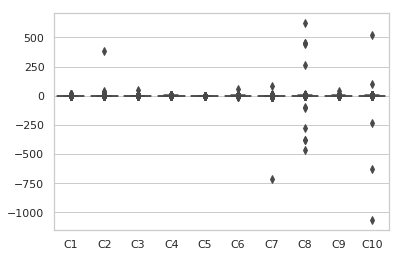

In [7]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=data2);

### Para acabar com os *outliers* utilizamos o metodo do desvio padrão

In [8]:
data2=data2[np.abs(data2["C8"]-data2["C8"].mean())<=(3*data2["C8"].std())]
data2=data2[np.abs(data2["C2"]-data2["C2"].mean())<=(3*data2["C2"].std())]
data2=data2[np.abs(data2["C7"]-data2["C7"].mean())<=(3*data2["C7"].std())]
data2=data2[np.abs(data2["C10"]-data2["C10"].mean())<=(3*data2["C10"].std())]

### Mostrando novamente o *boxplot* podemos ver que resolvemos o problema dos outliers

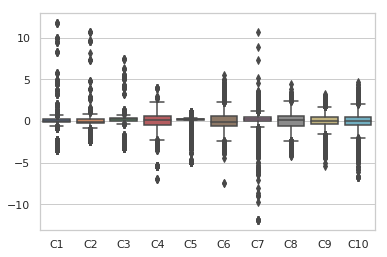

In [9]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=data2);

### Analisando o gráfico abaixo, podemos notar que nossa coluna *SAIDA* está desbalanceada, então devemos resolver isso.

A    4273
F    1955
E    1092
I     829
X     521
H     518
G     446
D     348
Y     266
C      99
W      44
Name: SAIDA, dtype: int64

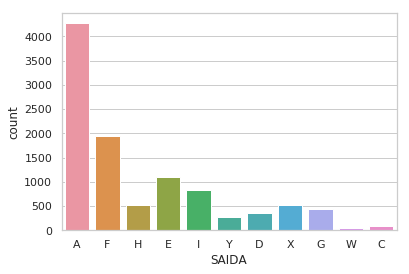

In [10]:
sns.countplot(x='SAIDA',data=data2)
data2['SAIDA'].value_counts()

In [11]:
features = list(data2)
features.remove('SAIDA')

### Utilizando *ClusterCentroids* para *UnderSampling*, ou seja, reduzimos todos os dados para o de menor quantidade, levando em consideração que *ClusterCentroids* escolhe os melhores dados para a redução

In [12]:
from imblearn.under_sampling import ClusterCentroids

X = data2[features]
y = data2['SAIDA']

 #aplica Cluster Centroids
cc = ClusterCentroids()
X_resampled, y_resampled = cc.fit_sample(X, y)

### Após a aplicação de *ClusterCentroids*, podemos ver abaixo o tamanho original do dataset e o tamento após o *undersampling*

In [13]:
from collections import Counter

print('Tamanho original do dataset {}'.format(Counter(y)))
print('Tamanho do dataset após undersampling {}'.format(Counter(y_resampled)))

Tamanho original do dataset Counter({'A': 4273, 'F': 1955, 'E': 1092, 'I': 829, 'X': 521, 'H': 518, 'G': 446, 'D': 348, 'Y': 266, 'C': 99, 'W': 44})
Tamanho do dataset após undersampling Counter({'I': 44, 'G': 44, 'Y': 44, 'F': 44, 'E': 44, 'X': 44, 'H': 44, 'A': 44, 'W': 44, 'D': 44, 'C': 44})


### Dividindo entre teino e testes, 70% treino e 30% teste

In [14]:
from sklearn.model_selection import train_test_split

# 70% treinamento e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

### Utilizando *MLPClassifier*, com duas camadas de 200 neurônios. 

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

train_X = X_train # input training data
train_y = y_train # output trainig data
test_X = X_test # input test data
test_y = y_test # output test data


clf = MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(200,200))

clf.fit(train_X, train_y)


y_pred=clf.predict(test_X)

print("\n ------------ Rede Neural MPLClassifier \n")

matriz_de_confusao = confusion_matrix(test_y, y_pred)
print(matriz_de_confusao)  

print(classification_report(test_y, y_pred))  

print('Acurácia:',accuracy_score(test_y, y_pred))


 ------------ Rede Neural MPLClassifier 

[[ 2  0  3  1  5  1  2  2  2  0  0]
 [ 0  8  3  2  0  0  0  0  0  0  0]
 [ 1  1  7  1  0  0  1  0  1  0  1]
 [ 0  1  4  4  1  0  0  2  1  0  1]
 [ 2  0  2  0  1  1  1  1  1  0  0]
 [ 0  0  0  0  1 13  0  0  0  0  0]
 [ 1  0  0  1  3  1  8  0  0  0  0]
 [ 1  3  0  0  1  1  0  8  0  0  0]
 [ 0  0  0  1  0  2  0  0  8  0  0]
 [ 0  0  1  3  0  0  0  1  2  4  1]
 [ 0  0  0  1  0  3  0  0  2  2  6]]
              precision    recall  f1-score   support

           A       0.29      0.11      0.16        18
           C       0.62      0.62      0.62        13
           D       0.35      0.54      0.42        13
           E       0.29      0.29      0.29        14
           F       0.08      0.11      0.10         9
           G       0.59      0.93      0.72        14
           H       0.67      0.57      0.62        14
           I       0.57      0.57      0.57        14
           W       0.47      0.73      0.57        11
           X       

Com essa quantidade baixa de amostras, conseguimos aproximadamente 47% de acurácia.  Os dados gerados podem ser verificados acima. 

## Uma outra opção seria fazer o OverSampling dos dados, porém corre o risco de ocorrer overfit

#### Utilizando *SMOTE()* para *OverSampling*, ou seja, aumentando todos os dados para o de maior quantidade.

In [16]:
from imblearn.over_sampling import SMOTE

X = data2[features]
y = data2['SAIDA']

sm = SMOTE()
X_resampled, y_resampled = sm.fit_sample(X, y)

#### Após a aplicação de *SMOTE*, podemos ver abaixo o tamanho original do dataset e o tamento após o *oversampling*

In [17]:
from collections import Counter

print('Tamanho original do dataset {}'.format(Counter(y)))
print('Tamanho do dataset após undersampling {}'.format(Counter(y_resampled)))

Tamanho original do dataset Counter({'A': 4273, 'F': 1955, 'E': 1092, 'I': 829, 'X': 521, 'H': 518, 'G': 446, 'D': 348, 'Y': 266, 'C': 99, 'W': 44})
Tamanho do dataset após undersampling Counter({'I': 4273, 'G': 4273, 'W': 4273, 'Y': 4273, 'F': 4273, 'E': 4273, 'H': 4273, 'A': 4273, 'X': 4273, 'D': 4273, 'C': 4273})


### Dividindo a base de dados em 70% treinamento e 30% teste

In [18]:
from sklearn.model_selection import train_test_split

# 70% treinamento e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

### Utilizando MLPClassifier, com duas camadas de 200 neurônios. 

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

train_X = X_train # input training data
train_y = y_train # output trainig data
test_X = X_test # input test data
test_y = y_test # output test data

clf = MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(200,200))

clf.fit(train_X, train_y)

y_pred=clf.predict(test_X)

print("\n ------------ Rede Neural MPLClassifier \n")

matriz_de_confusao = confusion_matrix(test_y, y_pred)
print(matriz_de_confusao)  

print(classification_report(test_y, y_pred))  

print('Acurácia:',accuracy_score(test_y, y_pred))


 ------------ Rede Neural MPLClassifier 

[[1131    1    5   13   53   15   19    2    0    1    3]
 [   0 1262    0    0    0    0    0    0    0    0    0]
 [   3    1 1239    2    0    0    0    0    0    0    0]
 [   5    4    4 1262    3    0    3    0    0    4    0]
 [  38    0    0    4 1214   13    7    0    0    0    1]
 [   4    0    0    0    5 1297    0    0    0    0    0]
 [   6    0    0    2    2    0 1275    0    0    0    0]
 [   1    0    0    1    0    0    0 1310    0    0    0]
 [   0    0    0    0    0    0    0    0 1286    0    0]
 [   3    0    0    2    1    0    0    0    0 1339    1]
 [   1    0    0    0    0    0    0    0    0    4 1249]]
              precision    recall  f1-score   support

           A       0.95      0.91      0.93      1243
           C       1.00      1.00      1.00      1262
           D       0.99      1.00      0.99      1245
           E       0.98      0.98      0.98      1285
           F       0.95      0.95      0.95    

Já com o número de amostras mais elevado, conseguimos um valor de 98% de Acurácia, todos os dados podem ser verificados acima. Porém nesse caso, como aumentamos o número de dados, muitos deles podem ter apenas se repetido, então pode ocorrer overfitting
